How many times do I have to pull before I no longer have any whole pills left? Expectation value and CL. 
  
Pretend this reflects a 30-month investment. How likely am I to lose all my money?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

plt.style.use('default')
plt.style.use('seaborn-whitegrid')

In [115]:
def spread_plotter(_df):
    remaining_avg = _df.mean(axis=1)
    remaining_low = _df.quantile(.10, axis=1)
    remaining_high = _df.quantile(.90, axis=1)

    remaining_max = _df.max(axis=1)
    remaining_min = _df.min(axis=1)

    fig, ax = plt.subplots()

    remaining_avg.plot(ax=ax, color='tab:red')

    ax.fill_between(remaining_low.index, remaining_low.values, remaining_high.values, color='purple', alpha=.75)

    ax.fill_between(remaining_low.index, remaining_low.values, remaining_min.values, color='navy', alpha=.5)
    ax.fill_between(remaining_low.index, remaining_high.values, remaining_max.values, color='navy', alpha=.5)
    

In [151]:
def remove_pill(num_whole, num_half):
    tot_remaining = num_whole + num_half
    if tot_remaining == 0:
        return 0.0 
    
    pill_index = np.random.choice(range(tot_remaining))
    
    if pill_index < num_whole:
        # choose a whole pill
        num_whole -= 1
        num_half += 1
    else:
        num_half -= 1

    return num_whole, num_half

results_dict = {ii:[] for ii in range(5000)}
init_whole = 100

for r in range(len(results_dict)):
    results_index = r
    num_whole = init_whole
    num_half = 0

    while num_whole > 0:
        num_whole, num_half = remove_pill(num_whole, num_half)
        results_dict[results_index].append(num_whole)
        
convergence_max = max([len(results_dict[ii]) for ii in range(len(results_dict))])

for ii in range(len(results_dict)):
    while len(results_dict[ii]) < convergence_max:
        results_dict[ii].append(0)

df = pd.DataFrame(results_dict)

first_zero = df.idxmin()

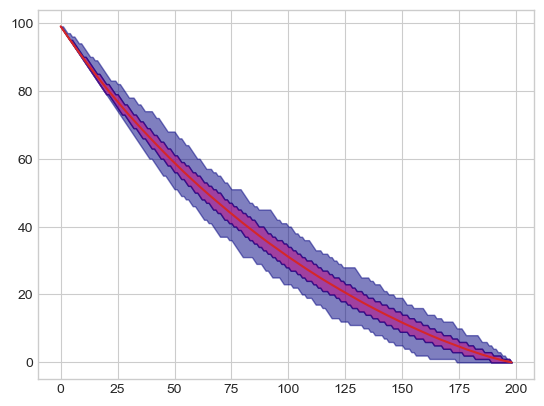

In [152]:
spread_plotter(df)

In [82]:
# # if incomplete:
# convergence_max = max([len(results_dict[ii]) for ii in range(len(results_dict))])

# for ii in range(len(results_dict)):
#     while len(results_dict[ii]) < convergence_max:
#         results_dict[ii].append(0)
        
# df = pd.DataFrame(results_dict)

# df = df.loc[:, df.idxmin()>0]

# How can we make the tails larger?
* Increase threshold to be some >0% of the starting total (e.g reduce to 10 from 20)
* Correlate draws


# 1 Tighten Threshold

In [150]:
def remove_pill(num_whole, num_half, threshold_stop):
    tot_remaining = num_whole + num_half
    if num_whole == threshold_stop:
        return threshold_stop 
    
    pill_index = np.random.choice(range(tot_remaining))
    
    if pill_index < num_whole:
        # choose a whole pill
        num_whole -= 1
        num_half += 1
    else:
        num_half -= 1

    return num_whole, num_half

results_dict = {ii:[] for ii in range(5000)}
init_whole = 100
threshold_stop = 10
for r in range(len(results_dict)):
    results_index = r
    num_whole = init_whole
    num_half = 0

    while num_whole > threshold_stop:
        num_whole, num_half = remove_pill(num_whole, num_half, threshold_stop)
        results_dict[results_index].append(num_whole)
        
convergence_max = max([len(results_dict[ii]) for ii in range(len(results_dict))])

for ii in range(len(results_dict)):
    while len(results_dict[ii]) < convergence_max:
        results_dict[ii].append(threshold_stop)

df2 = pd.DataFrame(results_dict)

first_zero = df.idxmin()

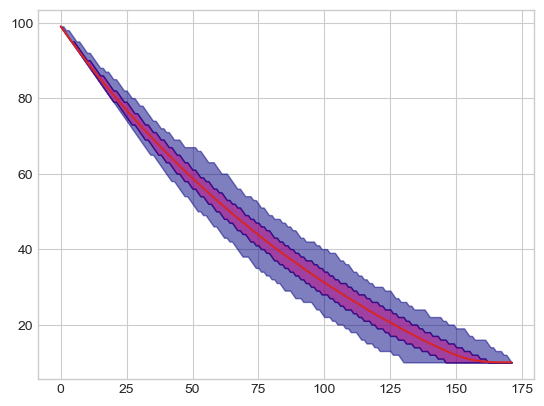

In [153]:
spread_plotter(df2)

# 2 Correlate Draws

16

In [157]:
def remove_pill(num_whole, num_half, threshold_stop, previous_whole):
    tot_remaining = num_whole + num_half
    if tot_remaining == threshold_stop:
        return num_whole, num_half, True 
    
    
    # detect first draw
    if previous_whole is None:
        correl_rand = 1
    else:
        correl_rand = np.random.choice(range(100))
    # force corellation 30% of the time:    
    if correl_rand <= 50 and num_half>9 and num_whole>0: # if 0, can't correlate
        is_whole = previous_whole
    else:
        pill_index = np.random.choice(range(tot_remaining))
        is_whole = pill_index < num_whole
        
    if is_whole:
        # choose a whole pill
        num_whole -= 1
        num_half += 1
    else:
        num_half -= 1

    return num_whole, num_half, is_whole

results_dict = {ii:[] for ii in range(5000)}
init_whole = 100
threshold_stop = 0

for r in range(len(results_dict)):
    
    results_index = r
    num_whole = init_whole
    num_half = 0
    is_whole = None
    
    while num_whole > threshold_stop:
        
        num_whole, num_half, is_whole = remove_pill(num_whole, num_half, threshold_stop, is_whole)
        results_dict[results_index].append(num_whole)
        
convergence_max = max([len(results_dict[ii]) for ii in range(len(results_dict))])

for ii in range(len(results_dict)):
    while len(results_dict[ii]) < convergence_max:
        results_dict[ii].append(threshold_stop)

df3 = pd.DataFrame(results_dict)

first_zero = df.idxmin()

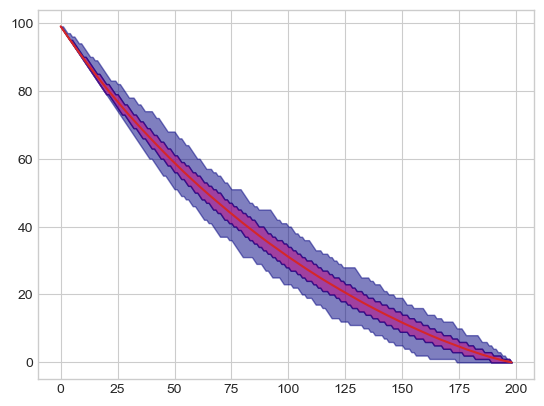

In [154]:
spread_plotter(df)

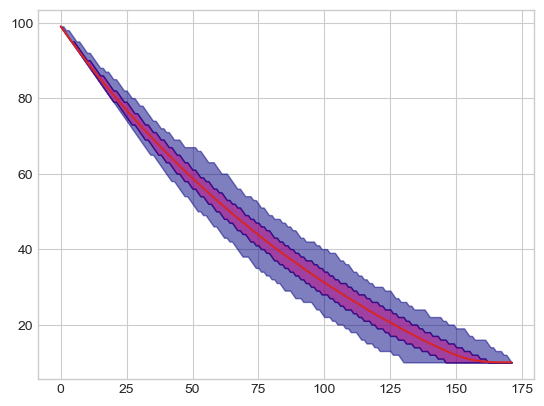

In [155]:
spread_plotter(df2)

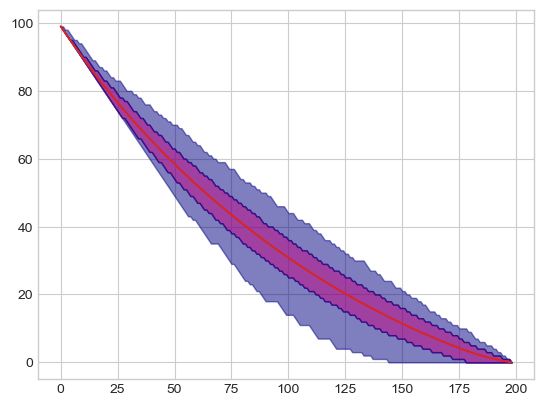

In [158]:
spread_plotter(df3)

# Closing Thoughts
Does illustrate that returns can go to 0 as early as 25% early than expected.   
Note that flat topline is consistent with the (unlikely) scenario of drawing only whole pills. 

Also, shows how a symmetric correlation produces asymmetric distributions, particularly near the extrema. 
  
  
An interesting follow on would be investigating asymmetric correlation, e.g. p(whole | whole) > p(half | half), for example, to replicate the brazil nut effect. 